In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.animation as animation
plt.style.use(['dark_background'])

import numpy as np
import pandas as pd
import scipy.io as sio
from scipy.io import loadmat

import os

In [2]:
cell_data_path = r"C:\Users\zfj\data\quadpatch\Raw Data .mat"
raw_data_path = r"C:\Users\zfj\data\quadpatch\Raw Data .h5"
cell_id = "20220805Dcc2"

In [3]:
m = loadmat(os.path.join(cell_data_path, f"{cell_id}.mat"), squeeze_me=True, struct_as_record=False)
# m = loadmat(os.path.join(cell_data_path, f"{cell_id}.mat"), squeeze_me=True)#, struct_as_record=False)

In [4]:
def visit(f, depth=0):
    if type(f) == np.ndarray and f.dtype == object:
        for i,field in enumerate(f):
            print('\t'*depth, f"{i}:")
            visit(field, depth = depth + 1)
    elif type(f) == sio.matlab._mio5_params.mat_struct:
        for field in f._fieldnames:
            a = getattr(f,field)
            if type(a) == np.ndarray:
                astr = f"({len(a)})"
            else:
                astr = ""
            print('\t'*depth, field, astr)
            visit(a, depth = depth + 1)
    else:
        print('\t'*depth, f)

visit(m['data'])

 Stimulus (3)
	 0:
		 Name 
			 Light Step
		 Params 
			 NDF1 
				 1
			 NDF2 
				 4
			 Intensity 
				 1
			 RstarIntensity 
				 1989.85
			 MeanLevel 
				 0.5
			 RstarMeanLevel 
				 994.925
			 BackgroundSize 
				 1000
			 PreTime 
				 0.5
			 StimTime 
				 1
			 TailTime 
				 1
			 framesPerStep (0)
				 []
			 epochNum (13)
				 [ 41  42  43  44  45  94  95  96  97  98  99 100 101]
			 StagePosition (2)
				 [-653  729]
			 SpotSize 
				 500
		 RawData 
			 SplitParameter 
				 chan1Hold
			 SplitValue 
				 -60
			 Data (4)
				 0:
					 [[-246.875 -241.25  -239.375 ... -226.25  -206.25  -205.   ]
 [-146.25  -148.125 -143.125 ... -143.75  -141.25  -144.375]
 [-286.25  -273.75  -263.75  ... -139.375 -132.5   -111.875]
 ...
 [ -83.75   -83.75   -80.625 ...  -76.875  -87.5    -87.5  ]
 [ -71.875  -73.125  -77.5   ... -121.875 -128.75  -121.25 ]
 [-111.875 -105.     -92.5   ...  -83.125  -82.5    -86.25 ]]
				 1:
					 [[-338.125 -338.75  -340.625 ... -371.875 -369.375 -

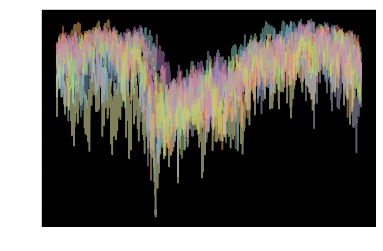

(array([  2.,   1.,   0.,   2.,   3.,   5.,  12.,   9.,   9.,  15.,  29.,
        30.,  44.,  64.,  77.,  88., 112., 118., 127., 127., 139., 157.,
       141., 133., 111.,  98., 108.,  93., 123., 109., 112., 122., 198.,
       175., 238., 209., 352., 303., 381., 510., 438., 492., 433., 398.,
       344., 331., 175., 119.,  78.,   6.]), array([-415.625 , -407.8375, -400.05  , -392.2625, -384.475 , -376.6875,
       -368.9   , -361.1125, -353.325 , -345.5375, -337.75  , -329.9625,
       -322.175 , -314.3875, -306.6   , -298.8125, -291.025 , -283.2375,
       -275.45  , -267.6625, -259.875 , -252.0875, -244.3   , -236.5125,
       -228.725 , -220.9375, -213.15  , -205.3625, -197.575 , -189.7875,
       -182.    , -174.2125, -166.425 , -158.6375, -150.85  , -143.0625,
       -135.275 , -127.4875, -119.7   , -111.9125, -104.125 ,  -96.3375,
        -88.55  ,  -80.7625,  -72.975 ,  -65.1875,  -57.4   ,  -49.6125,
        -41.825 ,  -34.0375,  -26.25  ]), <BarContainer object of 50 artists>)

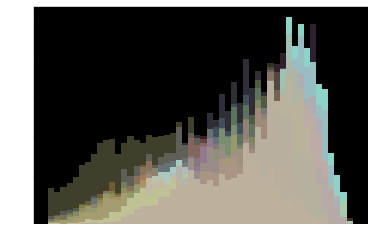

In [5]:
# plt.plot(m['data'].Stimulus[1].RawData.Data[0].T)
plt.plot(m['data'].Stimulus[1].RawData.Data[0].T[1522500:1530000,:], alpha=.5)

plt.show()

bins = plt.hist(m['data'].Stimulus[1].RawData.Data[0].T[1522500:1530000,0], bins=50)
print(bins)
for i in range(1,8):
    plt.hist(m['data'].Stimulus[1].RawData.Data[0].T[1522500:1530000,i], bins=bins[1], alpha=.25)


X,Y,intensity,startTime,endTime,diameter,flickerFrequency


(-137.5, 137.5, -134.5947815048315, 127.3779031399612)

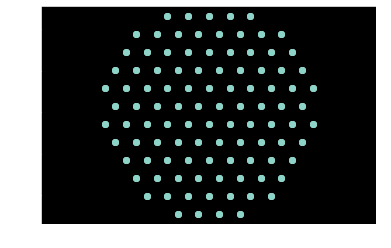

In [294]:
print(m['data'].Stimulus[1].Params.ShapeDataColumns[0])
m['data'].Stimulus[1].Params.ShapeDataMatrix[0]

#diam 23.5um, intensity 1, flicker none,

plt.scatter(m['data'].Stimulus[1].Params.ShapeDataMatrix[0][:,0], m['data'].Stimulus[1].Params.ShapeDataMatrix[0][:,1])
plt.axis('equal')

In [8]:
m['data'].Stimulus[1].RawData.Data[0].shape

(8, 1542500)

In [9]:
(
    dict(zip(m['data'].Stimulus[1].Params.ShapeDataColumns[0].split(','),m['data'].Stimulus[1].Params.ShapeDataMatrix[0][0,:])),
    dict(zip(m['data'].Stimulus[1].Params.ShapeDataColumns[0].split(','),m['data'].Stimulus[1].Params.ShapeDataMatrix[0][-1,:])),
)

({'X': -112.5,
  'Y': 7.216878364870351,
  'intensity': 1.0,
  'startTime': 0.0,
  'endTime': 0.25,
  'diameter': 23.5,
  'flickerFrequency': 0.0},
 {'X': 62.5,
  'Y': 93.81941874331422,
  'intensity': 1.0,
  'startTime': 152.5,
  'endTime': 152.75,
  'diameter': 23.5,
  'flickerFrequency': 0.0})

In [10]:
np.concatenate((m['data'].Stimulus[1].Params.ShapeDataMatrix[0], np.ones((306,1))), axis=1).shape
# np.ones(306,1)

(306, 8)

In [11]:
sd = np.concatenate([np.concatenate((sdm, i*np.ones((len(sdm),1))), axis=1) for i,sdm in enumerate(m['data'].Stimulus[1].Params.ShapeDataMatrix)], axis=0)
print(sd.shape)
u, ui = np.unique(sd[:,:2], axis = 0, return_inverse = True)
print(u.shape, ui.shape)

(2448, 8)
(102, 2) (2448,)


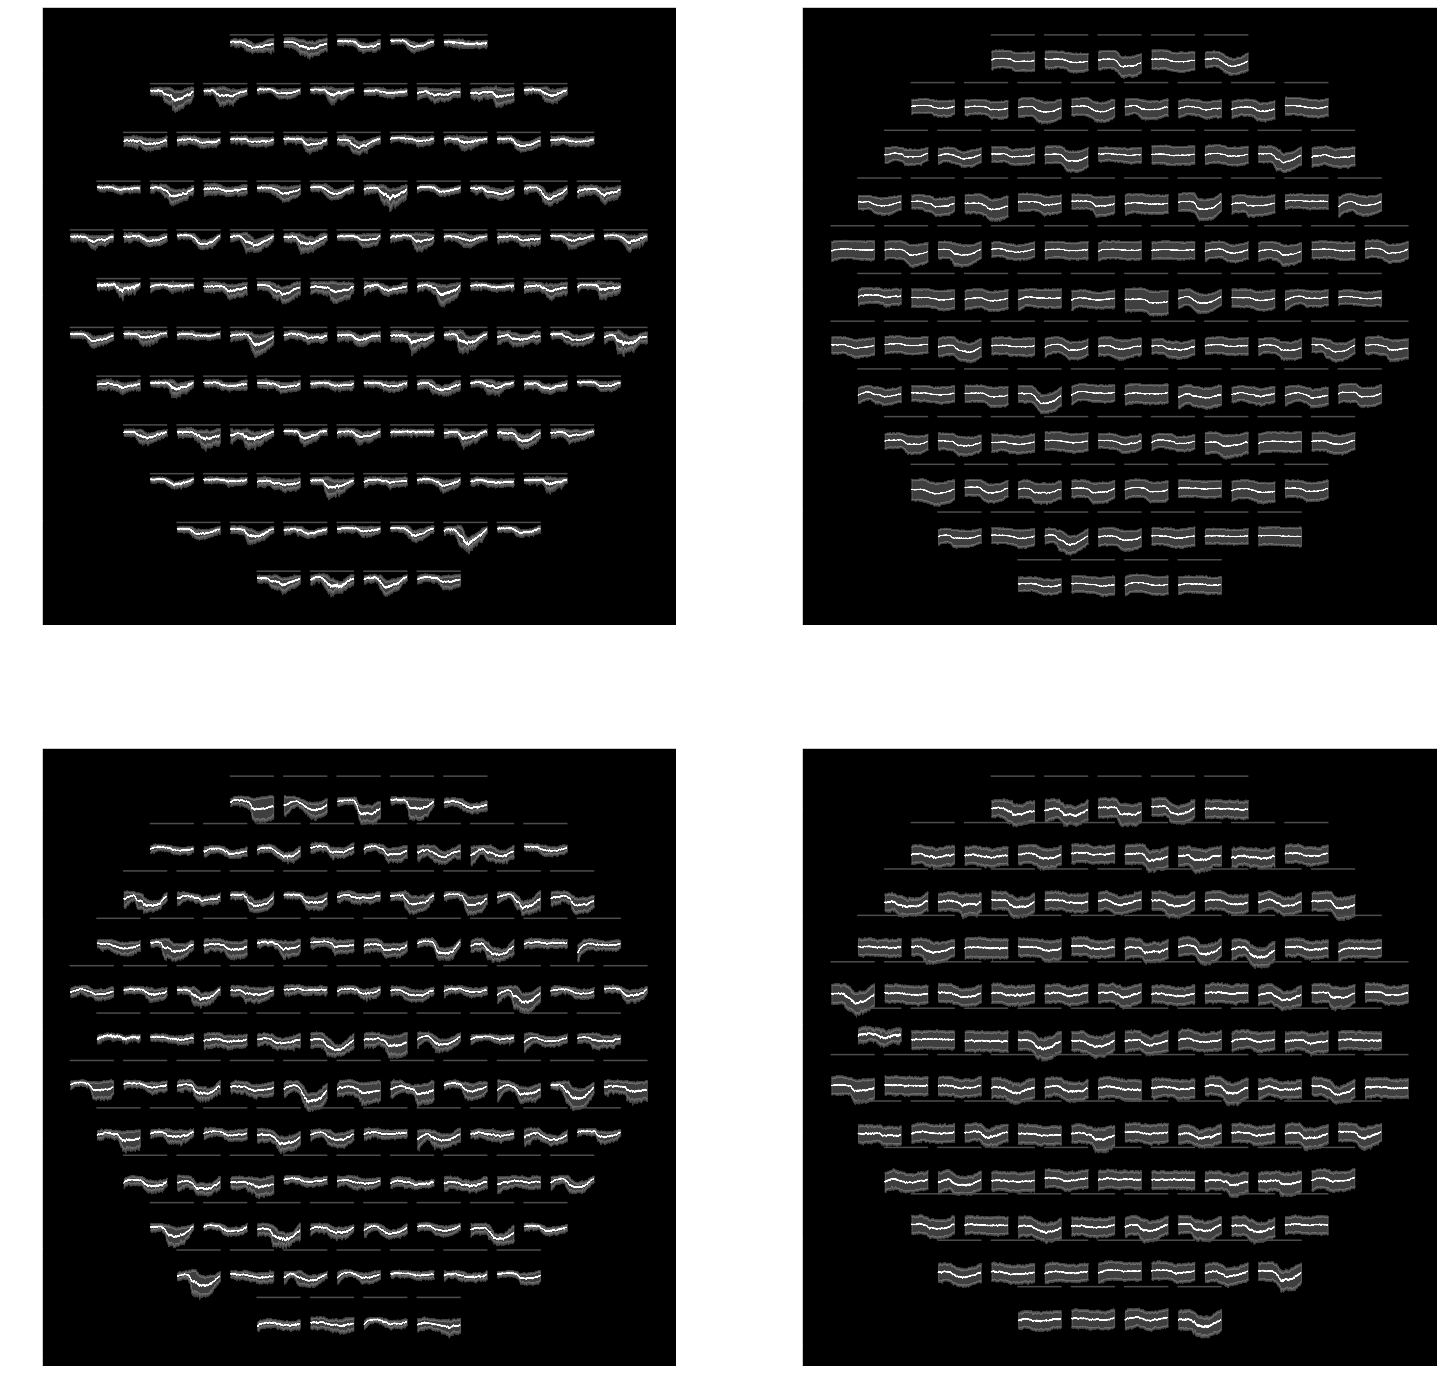

In [12]:
xs = np.linspace(-20/2,20/2,5000)
sc = 30
bl = 0

rd = m['data'].Stimulus[1].RawData.Data

c = np.empty((4, len(u)))

_,axs = plt.subplots(2,2,figsize=(25,25))
axs = axs.flatten()
for j in [0,1,2,3]: #cells
    for i in range(len(u)):
        x,y = u[i]
        t0,tf = sd[ui==i,3:5].T
        ti = sd[ui==i,-1].astype(int)
        
        t0 = (t0*10000).astype(int) - 500 - 2500
        tf = (tf*10000).astype(int) + 2000 - 2500
        
        keep = t0 > 0
        t0 = t0[keep]
        tf = tf[keep]        
        
        d = np.empty((len(t0), 5000))
        for k,(tt0,ttf,tti) in enumerate(zip(t0,tf,ti)):
            d[k, :] = rd[j][tti, tt0:ttf]

        axs[j].plot(xs + x, y * np.ones(xs.shape), color=[.3,.3,.3])   
        axs[j].fill_between(
            xs + x, 
            (d.mean(axis=0) + d.std(axis=0) - bl)/sc + y,
            (d.mean(axis=0) - d.std(axis=0) - bl)/sc + y, 
            color='w', alpha = .25)
        axs[j].plot(xs + x, (d.mean(axis=0) - bl)/sc + y, 'w', linewidth=.5)

        c[j,i] = np.percentile(d.mean(axis=0), 80) - np.percentile(d.mean(axis=0), 20)
        # c[j,i] = d.mean(axis=0).max() - d.mean(axis=0).min()
        # c[j,i] = -d.mean(axis=0).min()

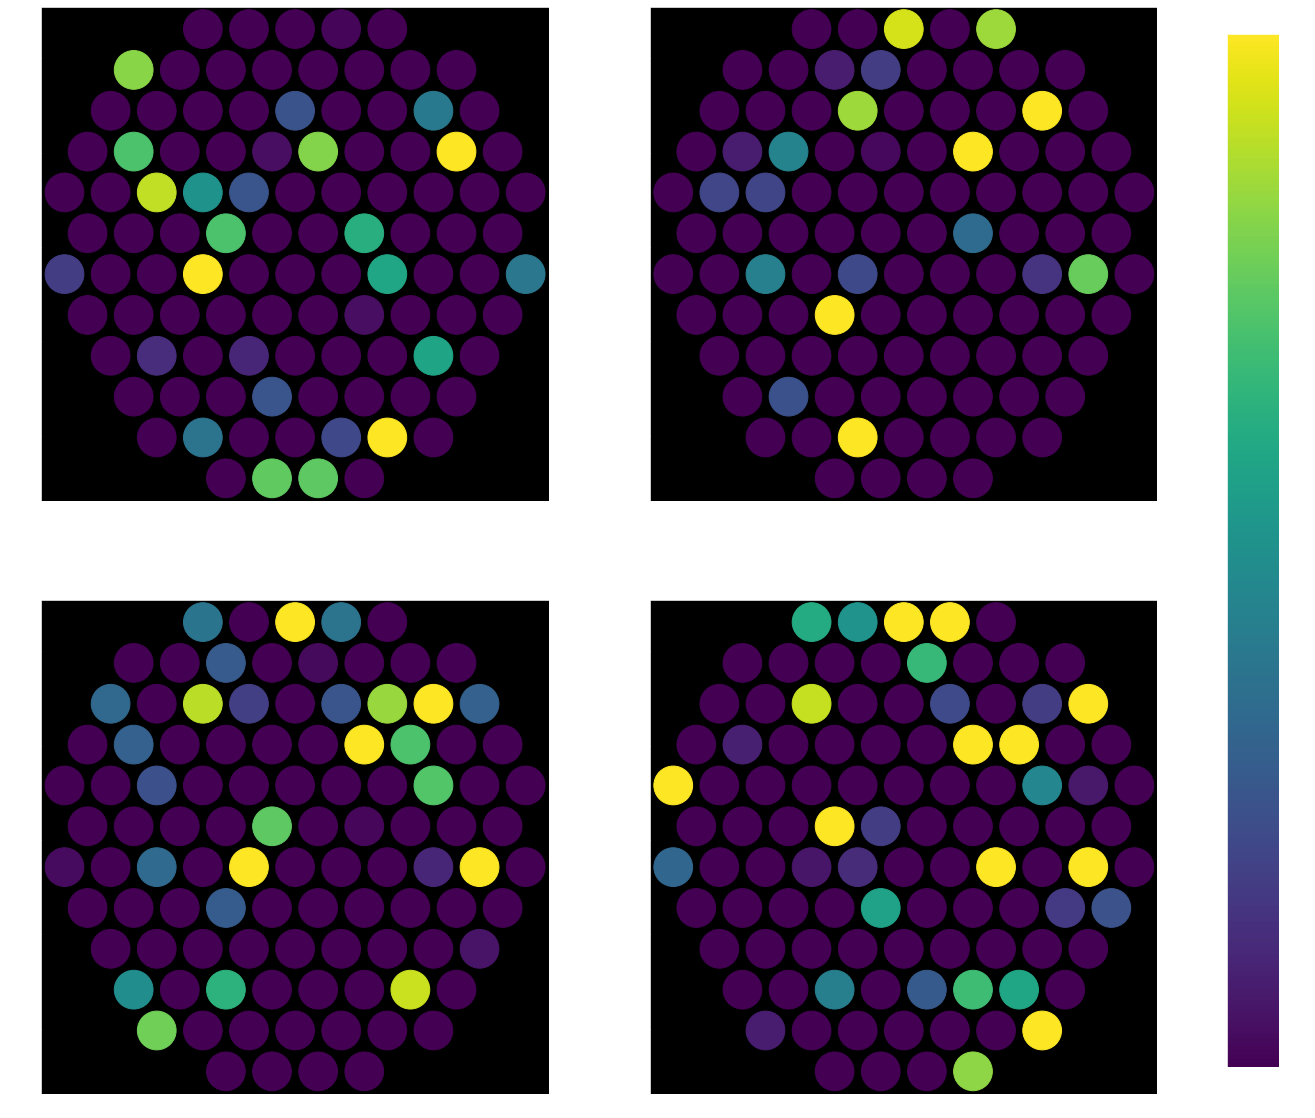

In [13]:
fig,axs = plt.subplots(2,2,figsize=(25,20))
axs = axs.flatten()

for j in [0,1,2,3]:
    cn = c[j] / c[j].max()
    s = axs[j].scatter(u[:,0], u[:,1], 1500, cn, cmap='viridis', vmin=0.5, vmax=0.75)#, vmin=0, vmax=1)

fig.colorbar(s, ax=axs, shrink=.95)
    

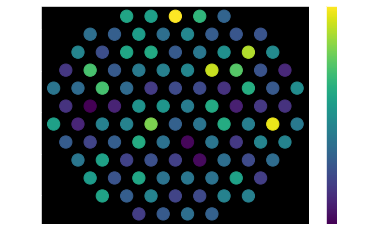

In [14]:
plt.scatter(u[:,0], u[:,1], 150, (c - c.min(axis=1, keepdims=True)).sum(axis=0), cmap='viridis')
plt.colorbar()

In [15]:
m['data'].Stimulus[1].Params.ShapeDataMatrix[0][0,:],m['data'].Stimulus[1].Params.ShapeDataMatrix[1][0,:],

(array([-112.5       ,    7.21687836,    1.        ,    0.        ,
           0.25      ,   23.5       ,    0.        ]),
 array([-112.5       ,    7.21687836,    1.        ,    0.        ,
           0.25      ,   23.5       ,    0.        ]))

In [16]:
data = []
for j in [0,1,2,3]: #cells
    dd = []
    for i in range(len(u)):
        x,y = u[i]
        t0,tf = sd[ui==i,3:5].T
        ti = sd[ui==i,-1].astype(int)
        
        t0 = (t0*10000).astype(int) - 500 - 2500
        tf = (tf*10000).astype(int) + 2000 - 2500
        
        keep = t0 > 0
        t0 = t0[keep]
        tf = tf[keep]        
        
        d = np.empty((len(t0), 5000))
        # d = np.empty((len(rd[j]), len(t0), 5000))
        for k,(tt0,ttf,tti) in enumerate(zip(t0,tf,ti)):
            # d[:, k, :] = rd[j][:, tt0:ttf]
            d[k, :] = rd[j][tti, tt0:ttf]
        dd.append(d)
    data.append(dd)

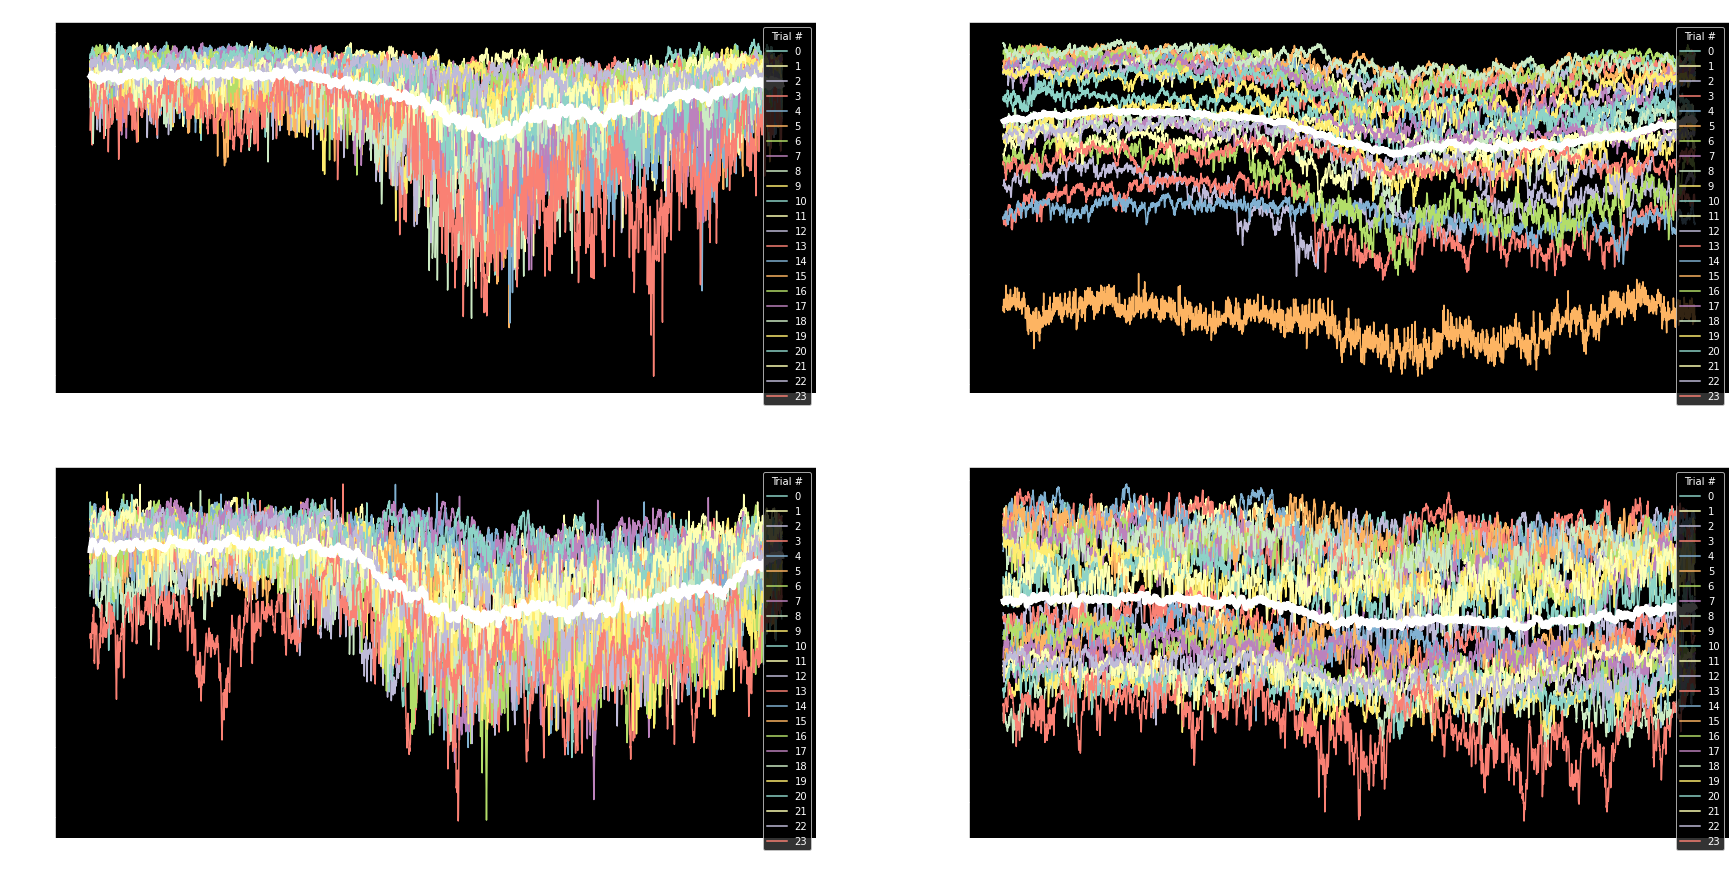

In [17]:
# plt.plot(d[:,:,:1500].mean(axis=-1).flatten())
[d.shape for d in dd]

di = 101

_,axs = plt.subplots(2,2,figsize=(30,15))
# plt.plot(dd[0][:,:,:500].mean(axis=-1).flatten())
for j,ax in enumerate(axs.flat):
    plt.sca(ax)
    for i in range(len(data[j][di])):
        plt.plot(np.linspace(-.05,.45,5000),data[j][di][i, :], label=str(i))
    plt.plot(np.linspace(-.05,.45,5000),data[j][di].mean(axis=0), 'w', linewidth=5)
    plt.xlabel('Time (sec)')
    plt.ylabel('Current (pA)')
    plt.legend(title='Trial #')
    plt.title(f'Cell {j}')


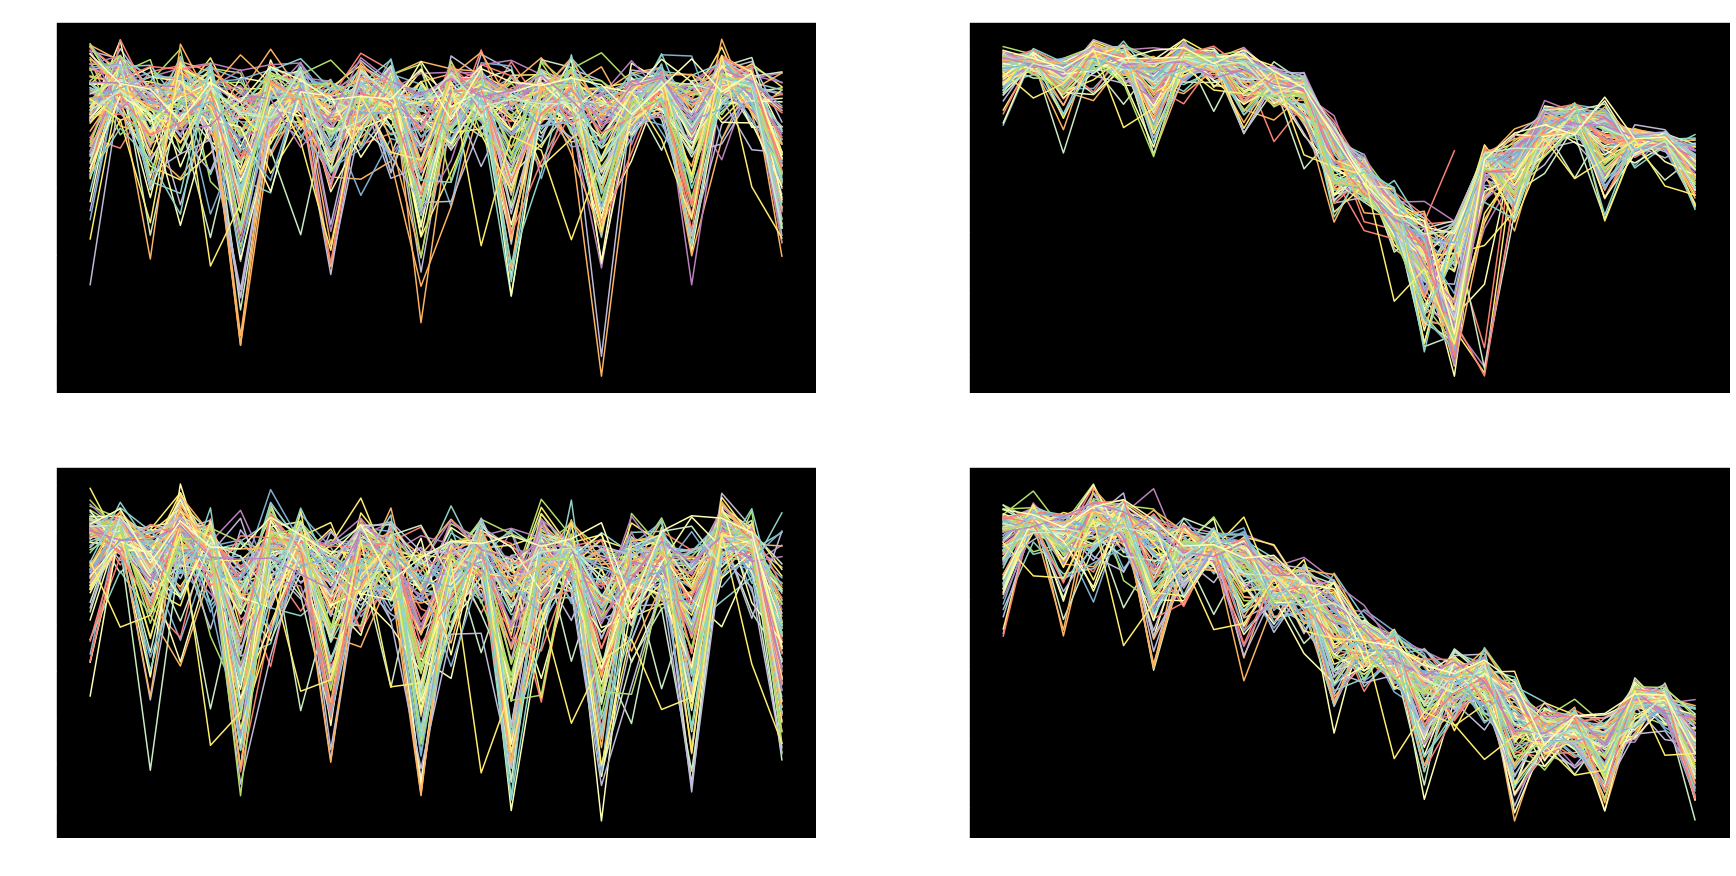

In [18]:

_,axs = plt.subplots(2,2,figsize=(30,15))
for j,ax in enumerate(axs.flat):
    plt.sca(ax)
    for i in range(102):
        plt.plot(data[j][i][:,:500].mean(axis=1).reshape((8,-1)).flatten())
    plt.title(f'Cell {j}')
    plt.xlabel('Trial #')
    plt.ylabel('Holding current (pA)')

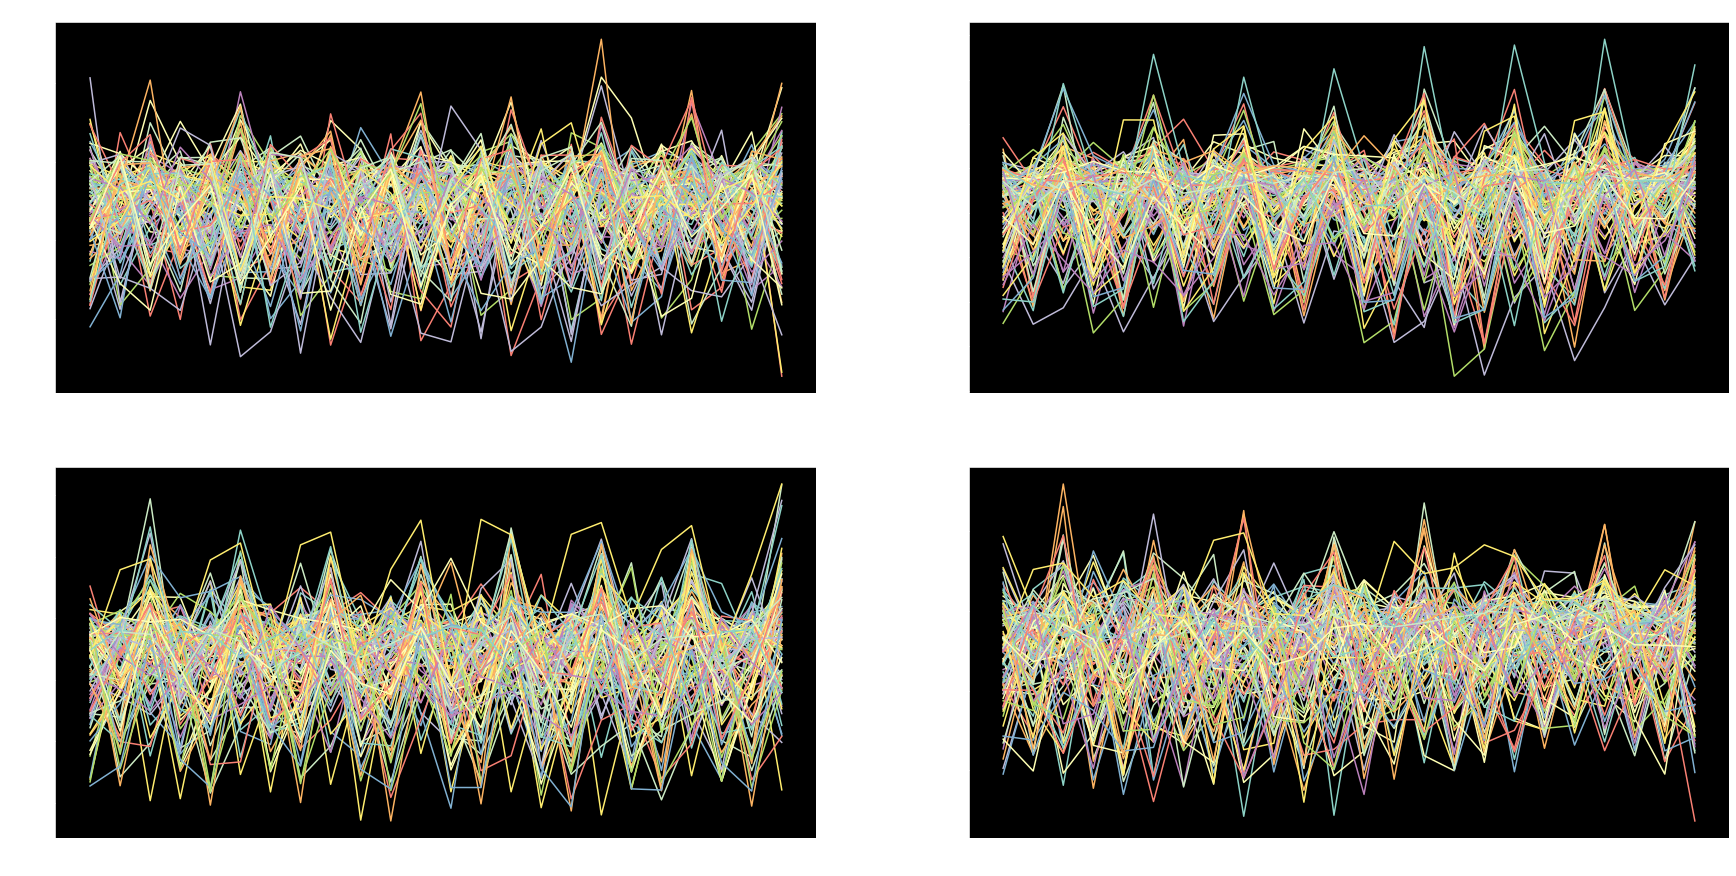

In [28]:

_,axs = plt.subplots(2,2,figsize=(30,15))
for j,ax in enumerate(axs.flat):
    plt.sca(ax)
    for i in range(102):
        plt.plot(data[j][i][:,2500:3500].mean(axis=1).reshape((8,-1)).flatten() - data[j][i][:,:500].mean(axis=1).reshape((8,-1)).flatten())
        # plt.plot(np.percentile(data[j][i][:,2500:3500],80,axis=1) - np.percentile(data[j][i][:,:500],20,axis=1))
    plt.title(f'Cell {j}')
    plt.xlabel('Trial #')
    plt.ylabel('Response amplitude (pA)')

In [76]:
#data should be shape... 102*(?) x 4 x 5000

ui.shape
# m['data'].Stimulus[1].Params.ShapeDataMatrix[0].shape
# 8 * 306
# 
# ui = 
dmat = np.stack([np.concatenate(data[i]) for i in range(4)])
dmat = np.moveaxis(dmat, 0, 1)
dui = np.concatenate([np.ones(len(data[0][i]), dtype=int)*i for i in range(len(data[0]))])
dui.shape, dmat.shape

((2440,), (2440, 4, 5000))

In [78]:
from sklearn.svm import SVC
from util import info


In [137]:
I = info.svm_info(dmat.reshape((-1,4*5000)), dui, 102, ncomps=10)
I

c:\Users\zfj\code\functionalimaginganalysis\python\util\info.py:39: RuntimeWarning: divide by zero encountered in log2
  HRS = -np.nansum(self.Py_x * np.log2(self.Py_x) * self.stim_prob)
c:\Users\zfj\code\functionalimaginganalysis\python\util\info.py:39: RuntimeWarning: invalid value encountered in multiply
  HRS = -np.nansum(self.Py_x * np.log2(self.Py_x) * self.stim_prob)
c:\Users\zfj\code\functionalimaginganalysis\python\util\info.py:55: RuntimeWarning: divide by zero encountered in log2
  HRS_ind = -np.nansum(Py_x_ind * np.log2(Py_x_ind) * self.stim_prob)
c:\Users\zfj\code\functionalimaginganalysis\python\util\info.py:55: RuntimeWarning: invalid value encountered in multiply
  HRS_ind = -np.nansum(Py_x_ind * np.log2(Py_x_ind) * self.stim_prob)
c:\Users\zfj\code\functionalimaginganalysis\python\util\info.py:56: RuntimeWarning: divide by zero encountered in log2
  HRS_sh = -np.nansum(self.Py_x_sh * np.log2(self.Py_x_sh) * self.stim_prob)
c:\Users\zfj\code\functionalimaginganalysis\py

2.3122571122168494

c:\Users\zfj\code\functionalimaginganalysis\python\util\info.py:38: RuntimeWarning: divide by zero encountered in log2
  HR = -np.nansum(self.Py * np.log2(self.Py))
c:\Users\zfj\code\functionalimaginganalysis\python\util\info.py:38: RuntimeWarning: invalid value encountered in multiply
  HR = -np.nansum(self.Py * np.log2(self.Py))
c:\Users\zfj\code\functionalimaginganalysis\python\util\info.py:39: RuntimeWarning: divide by zero encountered in log2
  HRS = -np.nansum(self.Py_x * np.log2(self.Py_x) * self.stim_prob)
c:\Users\zfj\code\functionalimaginganalysis\python\util\info.py:39: RuntimeWarning: invalid value encountered in multiply
  HRS = -np.nansum(self.Py_x * np.log2(self.Py_x) * self.stim_prob)
c:\Users\zfj\code\functionalimaginganalysis\python\util\info.py:55: RuntimeWarning: divide by zero encountered in log2
  HRS_ind = -np.nansum(Py_x_ind * np.log2(Py_x_ind) * self.stim_prob)
c:\Users\zfj\code\functionalimaginganalysis\python\util\info.py:55: RuntimeWarning: invalid value enc

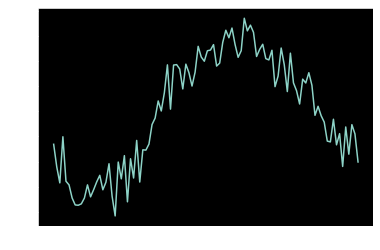

In [152]:
mod = info.MI(dui, 4, 4)
MI_t = [ mod.QE(dmat[:,:,t]) for t in np.arange(0,5000,50)] 
# It = [info.svm_info(dmat.reshape((-1,4*5000)), dui, 102, ncomps=10)]
plt.plot(MI_t)

In [94]:
fdata = dmat.reshape((-1,4*5000))
fdata.shape, dui.shape

((2440, 20000), (2440,))

In [132]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.svm import LinearSVR
from sklearn.multioutput import RegressorChain

cv = KFold(10, shuffle=True)
# n_comps = np.linspace(50,500,25).astype(int)
n_comps = 20
# y_hats = np.empty((len(n_comps),len(dui),2))
y_hats = np.empty((len(dui),2))
for train, test in cv.split(fdata):
        mms = MinMaxScaler().fit(fdata[train])

        # pca = PCA(200, whiten=True)
        pca = PCA(n_comps, whiten=True)
        comps = pca.fit_transform(mms.transform(fdata[train]))
        
        # for i in range(len(n_comps)):
        #     mod = RegressorChain(LinearSVR(C=1000.0))
        #     mod.fit(comps[:,:n_comps[i]], u[dui[train],:])
        #     y_hats[i,test,:] = mod.predict(np.ascontiguousarray(pca.transform(mms.transform(fdata[test]))[:,:n_comps[i]]))

        
        mod = RegressorChain(LinearSVR(C=1000.0, max_iter=20000))
        mod.fit(comps, u[dui[train],:])
        y_hats[test,:] = mod.predict(np.ascontiguousarray(pca.transform(mms.transform(fdata[test]))))

        print('.')


c:\Users\zfj\anaconda3\envs\suite2p\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


.


c:\Users\zfj\anaconda3\envs\suite2p\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\zfj\anaconda3\envs\suite2p\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


.


c:\Users\zfj\anaconda3\envs\suite2p\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\zfj\anaconda3\envs\suite2p\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


.


c:\Users\zfj\anaconda3\envs\suite2p\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\zfj\anaconda3\envs\suite2p\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


.


c:\Users\zfj\anaconda3\envs\suite2p\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\zfj\anaconda3\envs\suite2p\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


.


c:\Users\zfj\anaconda3\envs\suite2p\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\zfj\anaconda3\envs\suite2p\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


.


c:\Users\zfj\anaconda3\envs\suite2p\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\zfj\anaconda3\envs\suite2p\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


.


c:\Users\zfj\anaconda3\envs\suite2p\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\zfj\anaconda3\envs\suite2p\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


.


c:\Users\zfj\anaconda3\envs\suite2p\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\zfj\anaconda3\envs\suite2p\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


.


c:\Users\zfj\anaconda3\envs\suite2p\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


.


c:\Users\zfj\anaconda3\envs\suite2p\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [134]:
svm_i = info.MI(dui, ndims=2)
# MI_s = [[svm_i.QE(y_hats[i,:,:]) for i in range(len(n_comps))] for _ in range(10)]
MI_s = [svm_i.QE(y_hats) for _ in range(10)]
MI_s

c:\Users\zfj\code\functionalimaginganalysis\python\util\info.py:38: RuntimeWarning: divide by zero encountered in log2
  HR = -np.nansum(self.Py * np.log2(self.Py))
c:\Users\zfj\code\functionalimaginganalysis\python\util\info.py:38: RuntimeWarning: invalid value encountered in multiply
  HR = -np.nansum(self.Py * np.log2(self.Py))
c:\Users\zfj\code\functionalimaginganalysis\python\util\info.py:39: RuntimeWarning: divide by zero encountered in log2
  HRS = -np.nansum(self.Py_x * np.log2(self.Py_x) * self.stim_prob)
c:\Users\zfj\code\functionalimaginganalysis\python\util\info.py:39: RuntimeWarning: invalid value encountered in multiply
  HRS = -np.nansum(self.Py_x * np.log2(self.Py_x) * self.stim_prob)
c:\Users\zfj\code\functionalimaginganalysis\python\util\info.py:55: RuntimeWarning: divide by zero encountered in log2
  HRS_ind = -np.nansum(Py_x_ind * np.log2(Py_x_ind) * self.stim_prob)
c:\Users\zfj\code\functionalimaginganalysis\python\util\info.py:55: RuntimeWarning: invalid value enc

[0.4422492849617038,
 0.4248736066682295,
 0.4822283176878691,
 0.4301068178437152,
 0.49247822617988374,
 0.389370330168009,
 0.376724061012057,
 0.417053992863303,
 0.3562644534697908,
 0.44073628183544655]

31.789086255263324 59.54697095764297 4139.094566839257 4074.4454640933477
89.47949500114676


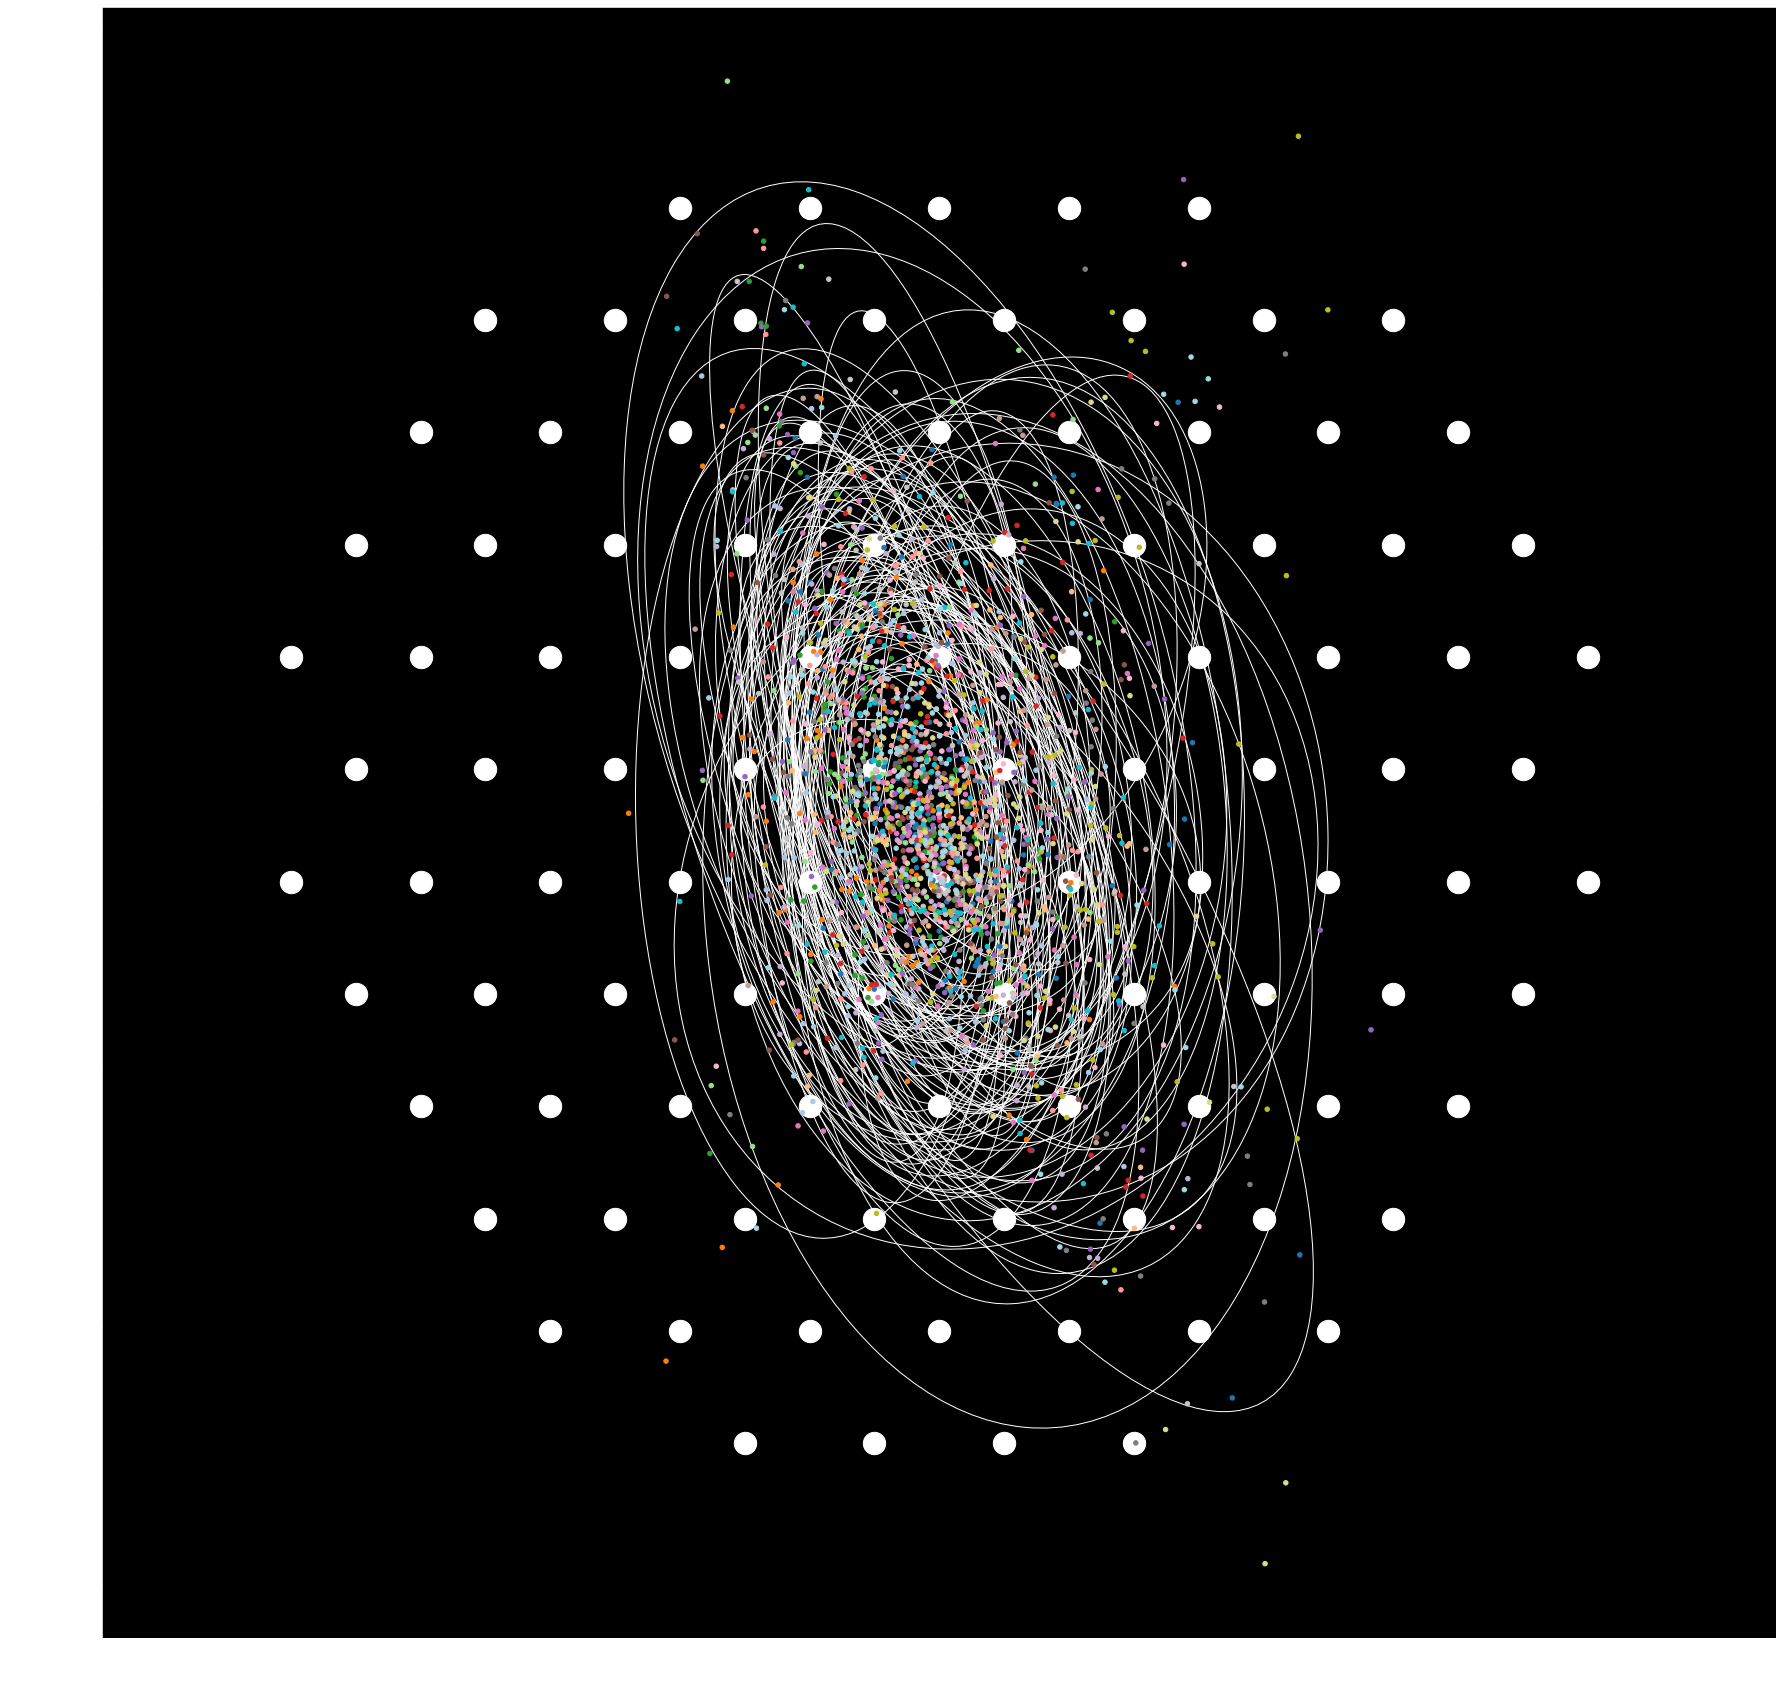

In [135]:
from matplotlib.patches import Ellipse

import matplotlib.transforms as transforms

plt.figure(figsize=(30,30))
ax = plt.gca()

n_std=2
scale_x = np.empty(len(u))
scale_y = np.empty(len(u))
mean_x = np.empty(len(u))
mean_y = np.empty(len(u))

for i in range(len(u)):
    cov = np.cov(y_hats[dui==i,0], y_hats[dui==i,1])
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2, facecolor='None', edgecolor='w')
    scale_x[i] = np.sqrt(cov[0, 0]) * n_std
    mean_x[i] = np.mean(y_hats[dui==i,0])

    # calculating the standard deviation of y ...
    scale_y[i] = np.sqrt(cov[1, 1]) * n_std
    mean_y[i] = np.mean(y_hats[dui==i,1])

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x[i], scale_y[i]) \
        .translate(mean_x[i], mean_y[i])

    ellipse.set_transform(transf + ax.transData)
    ax.add_patch(ellipse)

plt.scatter(u[:,0], u[:,1], s=500, color='white')

plt.scatter(y_hats[:,0], y_hats[:,1], s=20, c=dui, alpha=1, cmap='tab20')

plt.xticks(fontsize=32)
plt.yticks(fontsize=32)


plt.axis('equal')
# plt.xlim(-65,65)
# plt.ylim(-65,65)

# plt.grid('on')

# plt.xlim([-30,-10])
# plt.ylim([-15,1.5])
print(scale_x.mean(), scale_y.mean(), ((mean_x - u[:,0])**2).mean(), ((mean_y - u[:,1])**2).mean())
print(np.asarray([np.sqrt((y_hats[dui==i,0] - u[i,0])**2 + (y_hats[dui==i,1] - u[i,1])**2).mean(axis=0) for i in range(len(u))]).mean())

In [256]:
fdat = np.moveaxis(dmat,2,1)
fdat = fdat - fdat[:,:500,:].mean(axis=1, keepdims=True)
print(dmat.shape, fdat.shape, u[dui].shape)

(2440, 4, 5000) (2440, 5000, 4) (2440, 2)


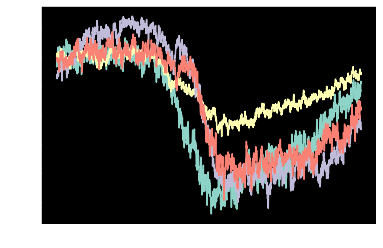

In [258]:
plt.plot(fdat[dui == 0].mean(axis=0))
plt.show()

In [259]:
from sklearn.model_selection import StratifiedKFold
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# from sklearn.model_selection import train_test_split

cv = StratifiedKFold(5, shuffle=True, random_state=0)
train, test = list(cv.split(fdat.reshape(-1,4*5000), dui))[0]
xtrain, xtest = fdat[train], fdat[test]
ytrain, ytest = u[dui[train], None, :], u[dui[test], None, :]
ltrain, ltest = dui[train], dui[test]

In [292]:
tmri = layers.Input((None,4))
ffns = []
cnv1 = tmri
for _ in range(2):
    for i in range(9):
        cnv1 = layers.SeparableConv1D(32, 2, dilation_rate=2**i, padding='causal')(cnv1)
        cnv1 = layers.LayerNormalization()(cnv1)
        cnv1 = layers.Activation('relu')(cnv1)
        cnv1 = layers.SeparableConv1D(4, 1)(cnv1)
        cnv1 = layers.LayerNormalization()(cnv1)
        cnv1 = layers.Add()([cnv1, tmri])
        ffns.append(cnv1)
    cnv1 = layers.Add()([*ffns, tmri])
ffnt = layers.Activation('sigmoid')(cnv1)
ffnt = layers.Dense(2)(ffnt)
tm_mod = keras.Model(inputs=tmri, outputs = ffnt)

# tmri = layers.Input(1000)
# ti = layers.Dense(128)(tmri)
# c = ti
# for i in range(8):
#     d = layers.Dense(128, activation='sigmoid')(c)
#     c = layers.Add()([d,ti])
# d2 = layers.Dense(16, activation='sigmoid')(c)
# o = layers.Dense(2)(d2)
# tm_mod = keras.Model(inputs=tmri, outputs=o)

# tmri = layers.Input(1000)
# # cnv1 = layers.Conv1D(32,500, activation='relu', padding='causal')(tmri)
# d = layers.Dense(16, activation='relu')(tmri)
# o = layers.Dense(2)(d)
# tm_mod = keras.Model(inputs=tmri, outputs=o)




# tmri = layers.Input(1000)
# # cnv1 = layers.Conv1D(32,500, activation='relu', padding='causal')(tmri)
# d = layers.Dense(128, activation='relu')(tmri)
# d = layers.Dense(128, activation='sigmoid')(d)
# o = layers.Dense(102)(d)
# tm_mod = keras.Model(inputs=tmri, outputs=o)



In [293]:
tm_mod.compile(
    loss = keras.losses.MeanSquaredError(),
    # optimizer=keras.optimizers.Adam(learning_rate=1),
    optimizer=keras.optimizers.RMSprop(learning_rate=0.1)
)

# tm_mod.compile(
#     optimizer=keras.optimizers.Adam(learning_rate=1),
#     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#     metrics=['accuracy'])

# tm_history = tm_mod.fit(xtrain[:,1::20,:].reshape(-1,1000), ltrain, validation_data=(xtest[:,1::20,:].reshape(-1,1000),ltest), epochs=200, callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',restore_best_weights=True, patience=50, verbose=1))


# tm_history = tm_mod.fit(xtrain[:,1::20,:].reshape(-1,1000), ytrain.reshape(-1,2), validation_data=(xtest[:,1::20,:].reshape(-1,1000),ytest.reshape(-1,2)), epochs=200, callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss',restore_best_weights=True, patience=20, verbose=1))
tm_history = tm_mod.fit(xtrain, ytrain, validation_data=(xtest,ytest), epochs=200, callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss',restore_best_weights=True, patience=20, verbose=1))


Epoch 1/200
61/61 [==============================] - 361s 6s/step - loss: 4370.5225 - val_loss: 4383.2515
Epoch 2/200
61/61 [==============================] - 374s 6s/step - loss: 4367.4849 - val_loss: 4383.4541
Epoch 3/200
61/61 [==============================] - 361s 6s/step - loss: 4367.2095 - val_loss: 4381.7778
Epoch 4/200
61/61 [==============================] - 386s 6s/step - loss: 4366.7544 - val_loss: 4382.3501
Epoch 5/200
61/61 [==============================] - 377s 6s/step - loss: 4366.6357 - val_loss: 4382.1108
Epoch 6/200
61/61 [==============================] - 373s 6s/step - loss: 4365.1455 - val_loss: 4381.7915
Epoch 7/200
61/61 [==============================] - 359s 6s/step - loss: 4364.6899 - val_loss: 4381.9507
Epoch 8/200
61/61 [==============================] - 361s 6s/step - loss: 4362.9521 - val_loss: 4382.0996
Epoch 9/200
32/61 [==============>...............] - ETA: 2:38 - loss: 4238.4629

KeyboardInterrupt: 

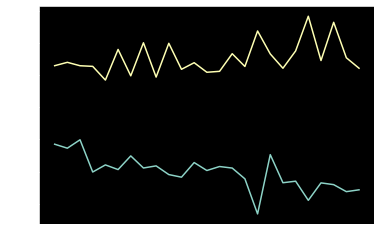

In [289]:
plt.plot(tm_history.history['loss'])
plt.plot(tm_history.history['val_loss'])

16/16 [==============================] - 0s 2ms/step


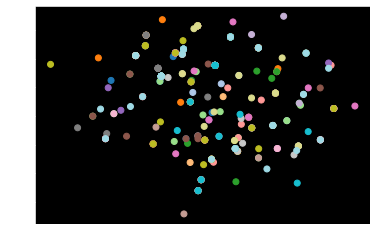

In [291]:
rctest = tm_mod.predict(xtest[:,1::20,:].reshape(-1,1000))

# print(rctest.shape)
plt.scatter(rctest[:,0],rctest[:,1], c = ltest, cmap='tab20')
